# HW06 : Text Classification with Neural Networks

ในหัวข้อนี้จะได้เรียนรู้การสร้างโมเดลสำหรับจำแนกข้อความ โดยใช้วิธีต่างๆ ดังนี้

2) TF-IDF (used as input features) + Neural network

3) Using Word embeding from ULMFit

4) Fine-tuning BERT

รวมไปถึงการประเมินประสิทธิภาพของแบบจำลอง


# Data Preparation

ในบทนี้เราจะใช้ข้อมูลของ Wongnai Sentiment Corpus มาใช้ในการสร้างแบบจำลอง



In [ ]:
! gdown --id 1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
! gdown --id 1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
! gdown --id 1EX6IckcRLeKxhpJW4Cr7ItamonDdlyvN
! gdown --id 1ahlb_JE4TtrrEtkX65yLOoYEtcsxkj6m


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xGvtr_HZLKHj4Emd4cbmndW3UBSkZfE8
To: /content/TextClass.csv
100% 132k/132k [00:00<00:00, 123MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dmn0eyYwy9Z8r94Xy7eVdyWTBxG-1RIo
To: /content/pos.txt
100% 761k/761k [00:00<00:00, 140MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google

In [ ]:
# import pandas as pd

# df = pd.read_csv('TextClass.xlsx', header=None, encoding='cp874') # Added encoding='cp874'
# df.columns = ['text', 'label']
# df.to_csv('TextClass.csv', index=False, encoding='utf-8') # Added encoding='utf-8' to save in utf-8

In [ ]:
# import pandas as pd
# import os

# data = pd.read_csv('TextClass.csv')  # เปลี่ยน 'TextClass.csv' เป็นชื่อไฟล์ของคุณ
# os.makedirs('txt_files', exist_ok=True)
# for label in data['label'].unique():
#     label_data = data[data['label'] == label]['text']  # เลือกข้อมูลเฉพาะ label นั้นๆ
#     filename = os.path.join('txt_files', f'{label}.txt')  # ตั้งชื่อไฟล์ตาม label
#     label_data.to_csv(filename, index=False, header=False)  # บันทึกข้อมูลลงในไฟล์ TXT

In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('pos.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: pos.txt not found.")
    exit()


data = {'text': lines, 'label': [0] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('pos.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created pos.csv")


Successfully created pos.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neu.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neu.txt not found.")
    exit()


data = {'text': lines, 'label': [1] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neu.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neu.csv")


Successfully created neu.csv


In [ ]:
# prompt: ทำ pos.txt เป็นไฟล์ .csv โดยให้มหัวข้อเป็น text และ label เป็น 0 ทั้งหมด

import pandas as pd

try:
    with open('neg.txt', 'r', encoding='utf-8') as f:  #แก้ไข encoding ให้รองรับภาษาไทย
        lines = f.readlines()
except FileNotFoundError:
    print("Error: neg.txt not found.")
    exit()


data = {'text': lines, 'label': [2] * len(lines)}
df = pd.DataFrame(data)
df.to_csv('neg.csv', index=False, encoding='utf-8') #แก้ไข encoding ให้รองรับภาษาไทย
print("Successfully created neg.csv")


Successfully created neg.csv


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('pos.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(250)

# Save the reduced DataFrame to a new CSV file
df.to_csv('pos_reduced.csv', index=False, encoding='utf-8')
print("Successfully created pos_reduced.csv with 1000 random samples.")


Successfully created pos_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neu.csv')
except FileNotFoundError:
    print("Error: pos.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(200)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neu_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neu_reduced.csv with 1000 random samples.")


Successfully created neu_reduced.csv with 1000 random samples.


In [ ]:
# prompt: สุ่มลบข้อมูล pos.csv ให้เหลือ 1000 ข้อมูล

import pandas as pd
import random

try:
    df = pd.read_csv('neg.csv')
except FileNotFoundError:
    print("Error: neg.csv not found. Please run the previous code block first.")
    exit()

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reduce the DataFrame to 1000 rows
df = df.head(300)

# Save the reduced DataFrame to a new CSV file
df.to_csv('neg_reduced.csv', index=False, encoding='utf-8')
print("Successfully created neg_reduced.csv with 1000 random samples.")


Successfully created neg_reduced.csv with 1000 random samples.


In [ ]:
# prompt: รวมไฟล์ textclass, pos.csv, neu.csv

import pandas as pd

# Assuming 'textclass.csv', 'pos.csv', and 'neu.csv' are in the current directory
try:
    df_textclass = pd.read_csv('TextClass.csv')
    df_pos = pd.read_csv('pos_reduced.csv')
    df_neu = pd.read_csv('neu_reduced.csv')
    df_neg = pd.read_csv('neg_reduced.csv')

    # Concatenate the DataFrames
    combined_df = pd.concat([df_textclass, df_pos, df_neu, df_neg], ignore_index=True)

    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv('TextClass.csv', index=False, encoding='utf-8')
    print("Successfully combined and saved to 'TextClass.csv'")

except FileNotFoundError:
    print("Error: One or more of the required CSV files not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Successfully combined and saved to 'TextClass.csv'


In [ ]:
import pandas as pd

# ตั้งค่า path ของไฟล์
file_path = '/content/TextClass.csv'


# โหลดไฟล์ CSV เป็น DataFrame
data = pd.read_csv(file_path)


#เปลี่ยนชื่อ labels
new_labels = {
    0: "คำทั่วไปทางการชม",
    1: "คำทั่วไป",
    2: "คำหยาบปกติ",
    3: "เหยียดรูปร่าง",
    4: "เหยียดชนชั้น",
    5: "เหยียดเพศ"
}

data['label'] = data['label'].map(new_labels)
data = data.rename(columns={'text': 'review'})
# แสดงข้อมูล
data

,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
# data['label'] = data['label'].replace("คำทั่วไป", "คำทั่วไปทางการชม")
data


,review,label
0,พี่เบ๊บบี้จัดฟันแล้วน่ารักสุดๆๆๆๆๆๆ,คำทั่วไปทางการชม
1,พี่เบ๊บบี้จัดฟันน่ารักมากก,คำทั่วไปทางการชม
2,พี่สวยมากค่ะ,คำทั่วไปทางการชม
3,งามมากกลูกสาวววว💛,คำทั่วไปทางการชม
4,คนสวย🥰🥰🥰,คำทั่วไปทางการชม
...,...,...
2295,กูเขดและเน๊าะ โปรวันพุธ มะเติมของเลยต้องรอคิวเ...,คำหยาบปกติ
2296,โห้ ไม่เคยเจอฟอร์จูน crv pajero ตามหลังเลยหรา\n,คำหยาบปกติ
2297,Mazda cx-3 ใหม่ คือไม่ไหวอะ เห็นละทนไม่ได้ สวย...,คำหยาบปกติ
2298,แดกเบียร์เหล้ากูเอียนสปาย\n,คำหยาบปกติ


In [ ]:
# #download data
# # !wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/pos.txt
# # !wget https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/neg.txt

# #create train/validate/test datasets
# from math import floor

# # def split_train_test_sets(file_list,train_num=0.8,val_num=0.1,test_num=0.1):

# #     split_train_index = floor(len(file_list) * train_num)
# #     split_val_index = floor(len(file_list) * (train_num+val_num))
# #     train = file_list[:split_train_index]
# #     val = file_list[split_train_index:split_val_index]
# #     test = file_list[split_val_index:]
# #     return train, val, test

# def file2list(fname):
#   with open(fname) as fp:
#     lines = fp.readlines()
#     return [line.strip() for line in lines]
# def list2file(items,fname):
#   file = open(fname,'w')
#   for item in items:
#     file.write(item.strip()+"\n")
#   file.close()

In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [ ]:
# pos_text = file2list("txt_files/0.txt")
# neu_text = file2list("txt_files/1.txt")
# neg1_text = file2list("txt_files/2.txt")
# neg2_text = file2list("txt_files/3.txt")
# neg3_text = file2list("txt_files/4.txt")
# neg4_text = file2list("txt_files/5.txt")

In [ ]:
# pos_df = pd.DataFrame(pos_text,columns=['review'])
# pos_df['label'] = "คำทั่วไปทางการชม"

# neu_df = pd.DataFrame(neu_text,columns=['review'])
# neu_df['label'] = "คำทั่วไป"

# neg1_df = pd.DataFrame(neg1_text,columns=['review'])
# neg1_df['label'] = "คำหยาบปกติ"

# neg2_df = pd.DataFrame(neg2_text,columns=['review'])
# neg2_df['label'] = "เหยียดรูปร่าง"

# neg3_df = pd.DataFrame(neg3_text,columns=['review'])
# neg3_df['label'] = "เหยียดชนชั้น"

# neg4_df = pd.DataFrame(neg4_text,columns=['review'])
# neg4_df['label'] = "เหยียดเพศ"

# data = pd.concat([pos_df, neu_df,neg1_df, neg2_df,neg3_df,neg4_df])

# data

In [ ]:
category_counts = data['label'].value_counts()

category_counts

,count
label,
คำทั่วไป,585
คำทั่วไปทางการชม,537
คำหยาบปกติ,503
เหยียดชนชั้น,245
เหยียดรูปร่าง,230
เหยียดเพศ,200


# Data Preprocessing


In [ ]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 99.8 MB/s eta 0:00:00


### Tokenization

In [ ]:
import re
import pandas as pd
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus.common import thai_stopwords

# โหลดข้อมูล (ต้องระบุไฟล์ CSV ที่ใช้)

def deEmojify(text):
    """ลบ Emoji ออกจากข้อความ"""
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols, Symbols for Legacy Computing, etc.
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_stop_word(text):
    """ลบ stop words ออกจากข้อความ"""
    stop_words = set(thai_stopwords())
    return ' '.join([word for word in text.split() if word not in stop_words])

def thai_clean_text(text):
    """ทำความสะอาดข้อความภาษาไทย"""
    if not isinstance(text, str) or text.strip() == "":
        return ""

    # ลบ Emoji
    text = deEmojify(text)

    # ลบอักขระพิเศษ
    text = re.sub(r'[.!@#%^&*()<>?/|}{~:]', '', text)

    # ลบตัวเลข
    text = re.sub(r'\d+', '', text)

    # ตัดคำ (Tokenization)
    words = word_tokenize(text, keep_whitespace=False)

    # ลบตัวอักษรที่ซ้ำกันเกิน 3 ตัว เช่น "มากกกก" → "มากกก"
    words = [re.sub(r'([ก-ฮ])\1{3,}', r'\1\1\1', word) for word in words]

    # ลบสระที่ซ้ำกันทิ้ง
    words = [re.sub(r'([ะ-ูเ-ไ็-๋ๆ])\1{2,}', r'\1\1', word) for word in words]

    # ลบคำที่เหลือแต่ตัวอักษรซ้ำ เช่น "นนนนนนน" → ลบทิ้ง
    words = [word for word in words if not re.fullmatch(r'([ก-ฮ])\1+', word)]

    # ลบ stop words
    # words = [word for word in words if word not in thai_stopwords()]

    return ' '.join(words).strip()

# ทำความสะอาดคอลัมน์ review
data['cleaned_review'] = data['review'].astype(str).apply(thai_clean_text)

# บันทึกผลลัพธ์
data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')

# แสดงตัวอย่างข้อมูลที่ทำความสะอาดแล้ว
print(data.sample(5))


                                                 review             label  \
30                                      น่ารักอ่ะชอบบบ💐  คำทั่วไปทางการชม   
1965  สินค้านี้ ลอรีเอะ ซุปเปอร์ เจนเทิลพลัส 25-30 ซ...          คำทั่วไป   
1724                                              ปะๆ\n  คำทั่วไปทางการชม   
33                      สวยขนาดนนี้มันก็หวันใจบ้างเเหละ  คำทั่วไปทางการชม   
1128  พวกไม่มีการมีงาน เกาะแต่แม่กิน แม่มึงคงภูมิใจม...      เหยียดชนชั้น   

                                         cleaned_review  
30                                       น่ารัก อ่ะ ชอบ  
1965  สินค้า นี้ ลอรีเอะ ซุปเปอร์ เจน เทิลพลัส - ซม ...  
1724                                               ปะ ๆ  
33          สวย ขนาด น นี้ มัน ก็ ห วัน ใจ บ้าง เ เห ละ  
1128  พวก ไม่ มี การ มี งาน เกาะ แต่ แม่ กิน แม่ มึง...  


### Removing stop words

In [ ]:
import pythainlp
thai_stopwords = pythainlp.corpus.common.thai_stopwords()

print(thai_stopwords)

frozenset({'เพื่อ', 'ประการใด', 'ด้วย', 'เสียก่อน', 'ตลอดมา', 'อย่างละ', 'นับแต่นั้น', 'ตาม', 'เท่าใด', 'นะ', 'ยกให้', 'มอง', 'ดังเก่า', 'นับจากนี้', 'เห็น', 'ลง', 'ทันทีทันใด', 'ทุกหน', 'หากว่า', 'มองว่า', 'ครั้งละ', 'เพิ่มเติม', 'แบบ', 'จ๊ะ', 'ถึงแม้ว่า', 'ซะจน', 'ช่วงๆ', 'มั้ย', 'บ่อยๆ', 'ยิ่งนัก', 'คล้ายว่า', 'เมื่อเย็น', 'อย่าง', 'รวม', 'ก็ตามที', 'เมื่อวันวาน', 'เท่ากัน', 'นี่นา', 'ได้มา', 'ชาว', 'คราว', 'เยอะๆ', 'ช่วงนั้น', 'อาจ', 'มิ', 'ณ', 'คราวนี้', 'จู่ๆ', 'หนอย', 'จึง', 'จากนี้', 'กันไหม', 'เพียงไร', 'ข้าง', 'แหละ', 'ยืนยาว', 'วันนี้', 'สูงกว่า', 'เมื่อใด', 'จรด', 'สมัยโน้น', 'เช่นก่อน', 'แห่งนั้น', 'อย่างไรเสีย', 'ดั่งกับ', 'ส่วนด้อย', 'อย่างไหน', 'นอกจาก', 'ได้รับ', 'พอสมควร', 'ด้วยเหตุเพราะ', 'เผื่อ', 'ระหว่าง', 'แก่', 'รวมด้วย', 'ทํา', 'จ๋า', 'ทุกๆ', 'ช่วย', 'ก่อนๆ', 'ทําให้', 'ล้วนแต่', 'แห่งโน้น', 'คราวหลัง', 'แค่เพียง', 'ที่แท้จริง', 'ซะจนกระทั่ง', 'รือว่า', 'รึว่า', 'เช่นเคย', 'ช้า', 'จวน', 'เท่านี้', 'เพื่อที่', 'ใหม่ๆ', 'บางแห่ง', 'ก็แค่', 'เสีย', 'ช่วงท้าย', 'ครั

In [ ]:
# def remove_stop_word(seg_text):
#     st = ""
#     words = seg_text.split(' ')
#     clean_words = []
#     for w in words:
#       if w not in thai_stopwords:
#         clean_words.append(w)
#     st = ' '.join(clean_words)
#     return  re.sub(' +', ' ', st)

# data['review'] = data.review.apply(remove_stop_word)
# data
# data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')  # Save to 'cleaned_data.csv'


# BERT fine-tuning for Text classification

เราจะใช้ตัวอย่างโค้ดจาก ตรงนี้นะครับ https://github.com/RahulBhalley/sentiment-analysis-bert.pytorch

In [ ]:
!pip install transformers thai2transformers
!pip install torch
!pip install torchtext==0.6.0
!pip install sentencepiece

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.5/500.5 kB 10.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta

In [ ]:
!pip install transformers

In [ ]:
data = pd.read_csv('cleaned_data.csv')

reviews = data['cleaned_review'].values
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# tmp_train 80%    test 20%
# train  val
#  70%   10%       test 20%
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels,test_size=0.15, random_state=1234)


In [ ]:
# # แบ่ง train 80% และ validation 15% จากข้อมูลที่เหลือ (95%)
# train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_val_sentences, train_val_labels, stratify=train_val_labels, test_size=0.1579, random_state=1234)  # 15 / 95 = 0.1579

# # แสดงจำนวนข้อมูล
# print("Train:", len(train_sentences))
# print("Validation:", len(val_sentences))
# print("Test:", len(test_sentences))

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

val_size = int(len(test_sentences)/1)
train = list(train_sentences)[:(len(train_sentences)-val_size)]
val = list(train_sentences)[(len(train_sentences)-val_size):]
test = list(test_sentences)

print("Train set:", train[:5])
print("Validation set:", val[:5])
print("Test set:", test[:5])
print("Number of training examples:", len(train))
print("Number of validation examples:", len(val))
print("Number of test examples:", len(test))

Train set: ['นิสสัน นาวา รา รถ สวย สมรรถนะ สุดยอด ชอบ ค่ะ', 'สวย จัง เลย มี ปลา ด้วย เห็น แล้ว คิดถึง คลอง แสนแสบ บ้าน เรา จัง', 'คิด เป็น ชุด ใช่ มั้ย ค้ะ ไม่ ใช่ ต่อ คน ใช่ มั้ย', 'ชอบ มิตซูบิชิ มาก ใช้ ดีมาก เคย ใช้ L ทน สุด ๆ คุ้ม ค่าเงิน สุด ๆ ถ้า จะ ซื้อ คัน ใหม่ ชอบ มาก ปา เจ โร่ ถ้า มี ตัง', 'เค งั้น ไม่ ก็']
Validation set: ['ตัวเอง อันนี้ หร่อย กว่า MK อีก น่ากิน', 'ราชภัฏ กับ คน อีสาน ของ คู่ กัน', 'หือ', 'แสงโสม ไง ละ กู ไม่ ชอบ ไง', 'โดน ไป พัน นึง']
Test set: ['สนุก มาก ๆ เพิ่ง ดู จบ เลย ย', 'พวก อิสาน นี้ ไม่ มีอันจะกิน กัน หรอก', 'มึง เก่ง มาก เลย เนาะ', 'น่ากิน มาก ครับ เห็น แล้ว อยาก ไป ทำ กิน เลย ทำ ง่าย มาก ๆ', 'กะ ผู้ ฮ่า ย โพด']
Number of training examples: 1610
Number of validation examples: 345
Number of test examples: 345


In [ ]:
# import pandas as pd
# import os

# # Assuming 'train_sentences', 'train_labels', 'val', 'test', 'test_labels' are still available from previous cells

# # สร้าง DataFrame สำหรับ train, val, test
# train_df = pd.DataFrame({'review': train_sentences, 'label': train_labels}) # Use train_sentences instead of train
# val_df = pd.DataFrame({'review': val, 'label': train_labels[len(train_sentences)-len(val):]})  # Use len(train_sentences) to index correctly
# test_df = pd.DataFrame({'review': test, 'label': test_labels})

# # รวมคอลัมน์ 'review' และ 'label' เพื่อระบุข้อมูลที่ซ้ำกัน
# train_df['combined'] = train_df['review'] + train_df['label'].astype(str)
# val_df['combined'] = val_df['review'] + val_df['label'].astype(str)

# # ลบข้อมูลที่ซ้ำกันใน train_df
# train_df = train_df[~train_df['combined'].isin(val_df['combined'])]

# # ลบคอลัมน์ 'combined' ออก
# train_df = train_df.drop(columns=['combined'])
# val_df = val_df.drop(columns=['combined'])

# os.makedirs('datasets', exist_ok=True)

# # บันทึก DataFrame เป็นไฟล์ CSV
# train_df.to_csv('datasets/train.csv', index=False)
# val_df.to_csv('datasets/val.csv', index=False)
# test_df.to_csv('datasets/test.csv', index=False)

In [ ]:
import pandas as pd
import os

# Assuming 'train_sentences', 'train_labels', 'val', 'test', 'test_labels' are still available from previous cells

# สร้าง DataFrame สำหรับ train, val, test
train_df = pd.DataFrame({'review': train_sentences, 'label': train_labels})
val_df = pd.DataFrame({'review': val, 'label': train_labels[len(train_sentences)-len(val):]})
test_df = pd.DataFrame({'review': test, 'label': test_labels})

# รวมคอลัมน์ 'review' และ 'label' เพื่อระบุข้อมูลที่ซ้ำกัน
train_df['combined'] = train_df['review'] + train_df['label'].astype(str)
val_df['combined'] = val_df['review'] + val_df['label'].astype(str)

# ลบข้อมูลที่ซ้ำกันใน train_df
train_df = train_df[~train_df['combined'].isin(val_df['combined'])]

# ลบคอลัมน์ 'combined' ออก
train_df = train_df.drop(columns=['combined'])
val_df = val_df.drop(columns=['combined'])

os.makedirs('datasets', exist_ok=True)

# บันทึก DataFrame เป็นไฟล์ CSV
train_df.to_csv('datasets/train.csv', index=False)
val_df.to_csv('datasets/val.csv', index=False)
test_df.to_csv('datasets/test.csv', index=False)

In [ ]:
# นับจำนวนข้อมูลของแต่ละคลาส
class_counts = train_df['label'].value_counts()

# คำนวณเปอร์เซ็นต์ของแต่ละคลาส (โดยไม่แสดงทศนิยม)
class_percentages = (class_counts / len(train_df) * 100).astype(int)

# สร้าง DataFrame ใหม่เพื่อแสดงผลลัพธ์
result_df = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentages})

result_df.loc['Total'] = [result_df['Count'].sum(), result_df['Percentage'].sum()]


# พิมพ์ผลลัพธ์
print(result_df)

       Count  Percentage
label                   
0        396          24
1        392          24
2        338          21
3        174          10
4        150           9
5        143           8
Total   1593          96


In [ ]:
# นับจำนวนข้อมูลของแต่ละคลาส
class_counts = val_df['label'].value_counts()

# คำนวณเปอร์เซ็นต์ของแต่ละคลาส (โดยไม่แสดงทศนิยม)
class_percentages = (class_counts / len(val_df) * 100).astype(int)

# สร้าง DataFrame ใหม่เพื่อแสดงผลลัพธ์
result_df = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentages})

result_df.loc['Total'] = [result_df['Count'].sum(), result_df['Percentage'].sum()]

# พิมพ์ผลลัพธ์
print(result_df)

       Count  Percentage
label                   
0         95          27
2         90          26
1         63          18
4         40          11
3         34           9
5         23           6
Total    345          97


In [ ]:
# นับจำนวนข้อมูลของแต่ละคลาส
class_counts = test_df['label'].value_counts()

# คำนวณเปอร์เซ็นต์ของแต่ละคลาส (โดยไม่แสดงทศนิยม)
class_percentages = (class_counts / len(test_df) * 100).astype(int)

# สร้าง DataFrame ใหม่เพื่อแสดงผลลัพธ์
result_df = pd.DataFrame({'Count': class_counts, 'Percentage': class_percentages})

result_df.loc['Total'] = [result_df['Count'].sum(), result_df['Percentage'].sum()]

# พิมพ์ผลลัพธ์
print(result_df)

       Count  Percentage
label                   
0         88          25
1         81          23
2         75          21
3         37          10
4         34           9
5         30           8
Total    345          96


In [ ]:
# #copy data because we need to used module name data
# reviews = data['review'].values
# labels = data['label'].values
# encoder = LabelEncoder()
# encoded_labels = encoder.fit_transform(labels)

# train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels,test_size=0.2, random_state=1234)

In [ ]:
# Training configurations
SEED = 1234
TRAIN = False
BATCH_SIZE = 16

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
# Bert model and its tokenizer
from transformers import BertModel,AutoTokenizer
# Text data
from torchtext import data as torchtext_data, datasets
# Numerical computation
import numpy as np
# standard library
import random
import time
# Configuration
#from config import *

# Set random seed for reproducible experiments
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# Get tokens for BERT
from transformers import BertTokenizer, BertModel,AutoTokenizer
import numpy as np

import time
import random
import functools
import math


bert_pretrained="airesearch/wangchanberta-base-att-spm-uncased"
#tokenizer = ThaiWordsSyllableTokenizer.from_pretrained(bert_pretrained)
tokenizer = AutoTokenizer.from_pretrained(bert_pretrained)

init_token_id = tokenizer.cls_token_id
eos_token_id  = tokenizer.sep_token_id
pad_token_id  = tokenizer.pad_token_id
unk_token_id  = tokenizer.unk_token_id

max_input_len = 512 #tokenizer.max_model_input_sizes

try:
    max_input_len = tokenizer.max_model_input_sizes['camembert-base']
except:
    max_input_len = 512

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from torchtext.data import Field, Dataset, Example
#from torchtext.legacy import data
#from torchtext.data import Field, Dataset, Example
import torchtext.data as tdata
import pandas as pd

class DataFrameDataset(Dataset):
    """Class for using pandas DataFrames as a datasource"""
    def __init__(self, examples, fields, filter_pred=None):
        """
        Create a dataset from a pandas dataframe of examples and Fields
        Arguments:
            examples pd.DataFrame: DataFrame of examples
            fields {str: Field}: The Fields to use in this tuple. The
                string is a field name, and the Field is the associated field.
            filter_pred (callable or None): use only exanples for which
                filter_pred(example) is true, or use all examples if None.
                Default is None
        """
        self.examples = examples.apply(SeriesExample.fromSeries, args=(fields,), axis=1).tolist()
        if filter_pred is not None:
            self.examples = filter(filter_pred, self.examples)
        self.fields = dict(fields)
        # Unpack field tuples
        for n, f in list(self.fields.items()):
            if isinstance(n, tuple):
                self.fields.update(zip(n, f))
                del self.fields[n]

class SeriesExample(Example):
    """Class to convert a pandas Series to an Example"""

    @classmethod
    def fromSeries(cls, data, fields):
        return cls.fromdict(data.to_dict(), fields)

    @classmethod
    def fromdict(cls, data, fields):
        ex = cls()

        for key, field in fields.items():
            if key not in data:
                raise ValueError("Specified key {} was not found in "
                "the input data".format(key))
            if field is not None:
                setattr(ex, key, field.preprocess(data[key]))
            else:
                setattr(ex, key, data[key])
        return ex

In [ ]:
import torchtext
from sklearn.model_selection import train_test_split
import pandas as pd
import random

# Tokenize and crop sentence to 510 (for 1st and last token) instead of 512 (i.e. `max_input_len`)
def tokenize_and_crop(sentence):
  #print(sentence)
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  return tokens

# Load the IMDB dataset and
# return (train_iter, valid_iter, test_iter) tuple
def load_data():
    text = torchtext.data.Field(
        batch_first=True,
        use_vocab=False,
        tokenize=tokenize_and_crop,
        preprocessing=tokenizer.convert_tokens_to_ids,
        init_token=init_token_id,
        pad_token=pad_token_id,
        unk_token=unk_token_id
    )

    label = torchtext.data.LabelField(dtype=torch.float)

    fields = {'cleaned_review': text, 'label': label}

    # Convert pandas DataFrame to a list of
    data['cleaned_review'] = data['cleaned_review'].astype(str)  # Convert to string
    examples = data.apply(lambda row: SeriesExample.fromSeries(row, fields), axis=1).tolist()

    # Split the data into train, validation, and test sets
    train_examples, test_examples = train_test_split(examples, test_size=0.2, random_state=1234, stratify=data['label'])
    train_examples, val_examples = train_test_split(train_examples, test_size=1/8, random_state=1234, stratify = [example.label for example in train_examples]) # 1/8 of the total = 1/8 of 0.8 = 0.1


    train_ds = torchtext.data.Dataset(train_examples, fields)
    val_ds = torchtext.data.Dataset(val_examples, fields)
    test_ds = torchtext.data.Dataset(test_examples, fields)

    print(f"training examples count: {len(train_ds)}")
    print(f"validation examples count: {len(val_ds)}")
    print(f"test examples count: {len(test_ds)}")

    label.build_vocab(train_ds)

    train_iter, valid_iter, test_iter = torchtext.data.BucketIterator.splits(
        (train_ds, val_ds, test_ds),
        batch_size=BATCH_SIZE,
        device=device,
        sort_key=lambda x: len(x.cleaned_review),
        sort_within_batch=False,
    )
    print(label.vocab.stoi)

    return train_iter, valid_iter, test_iter

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
load_data()

training examples count: 1610
validation examples count: 230
test examples count: 460
defaultdict(None, {'คำทั่วไป': 0, 'คำทั่วไปทางการชม': 1, 'คำหยาบปกติ': 2, 'เหยียดชนชั้น': 3, 'เหยียดรูปร่าง': 4, 'เหยียดเพศ': 5})


(<torchtext.data.iterator.BucketIterator at 0x79ef4c8fb350>,
 <torchtext.data.iterator.BucketIterator at 0x79ef4bfa7050>)

In [ ]:
#
# Build model
#

bert_model = BertModel.from_pretrained(bert_pretrained)

You are using a model of type camembert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/423M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerNorm.weight', 'encoder.layer.0.output.d

In [ ]:
# #
# # Freezing BERT
#
for param in bert_model.parameters():
    param.requires_grad = False

In [ ]:
# Sentiment model containing pretrained BERT as backbone
# and two-GRU layers for analyzing the BERT hidden representation
# and a linear layer for classfification (the sigmoid is applied by the criterion during training).
import torch.nn as nn

class SentimentModel(nn.Module):
  def __init__(
    self,
    bert,
    hidden_dim,
    output_dim,
    n_layers,
    bidirectional,
    dropout
  ):

    super(SentimentModel, self).__init__()

    self.bert = bert
    embedding_dim = bert.config.to_dict()['hidden_size']
    self.rnn = nn.GRU(
      embedding_dim,
      hidden_dim,
      num_layers=n_layers,
      bidirectional=bidirectional,
      batch_first=True,
      dropout=0 if n_layers < 2 else dropout
    )
    self.out = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
    self.dropout = nn.Dropout(dropout)

  def forward(self, text):
    with torch.no_grad():
      embedded = self.bert(text).last_hidden_state

    _, hidden = self.rnn(embedded)

    if self.rnn.bidirectional:
      hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
    else:
      hidden = self.dropout(hidden[-1,:,:])

    output = self.out(hidden)
    return output

In [ ]:
# Architecture
HIDDEN_DIM = 256
OUTPUT_DIM = 6
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25
N_EPOCHS = 200

In [ ]:
model = SentimentModel(
  bert_model,
  HIDDEN_DIM,
  OUTPUT_DIM,
  N_LAYERS,
  BIDIRECTIONAL,
  DROPOUT
)
print(model)

SentimentModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(25005, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
from tqdm import tqdm
# time taken for single epoch
def epoch_time(start_time, end_time):
  elapsed_time = end_time - start_time
  elapsed_mins = int(elapsed_time / 60)
  elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
  return elapsed_mins, elapsed_secs

# computes accuracy for multiclass classification
def multiclass_accuracy(preds, y):
  # Get predicted class by taking argmax
  y_pred_class = torch.argmax(preds, dim=1)
  correct = (y_pred_class == y).float()  # Compare with actual labels
  acc = correct.sum() / len(correct)
  return acc

# training step
def train(model, iterator, optimizer, criterion):
  # stats
  epoch_loss = 0
  epoch_acc = 0
  # train mode
  model.train()

  for batch in tqdm(iterator):
    # train step
    optimizer.zero_grad()
    #print(batch.review)
    predictions = model(batch.cleaned_review) #removed squeeze(1)
    loss = criterion(predictions, batch.label.long()) #convert to long
    acc = multiclass_accuracy(predictions, batch.label.long()) # convert to long
    loss.backward()
    optimizer.step()
    # stats
    epoch_loss += loss.item()
    epoch_acc += acc.item()

  return epoch_loss / len(iterator), epoch_acc / len(iterator)

# evaluates the model on given iterator (either
# train_iter, valid_iter, or test_iter)
def evaluate(model, iterator, criterion):

  epoch_loss = 0
  epoch_acc = 0
  # evaluation mode
  model.eval()

  with torch.no_grad():
    for batch in iterator:
      predictions = model(batch.cleaned_review) #remove squeeze(1)
      loss = criterion(predictions, batch.label.long()) # convert to long
      acc = multiclass_accuracy(predictions, batch.label.long()) # convert to long
      epoch_loss += loss.item()
      epoch_acc += acc.item()

  return epoch_loss / len(iterator), epoch_acc / len(iterator)

# function to make sentiment prediction during inference
def predict_sentiment(model, tokenizer, sentence):
  model.eval()
  tokens = tokenizer.tokenize(sentence)
  tokens = tokens[:max_input_len - 2]
  indexed = [init_token_id] + tokenizer.convert_tokens_to_ids(tokens) + [eos_token_id]
  tensor = torch.LongTensor(indexed).to(device)
  tensor = tensor.unsqueeze(0)
  prediction = torch.argmax(model(tensor))
  return tensor

In [ ]:
train_losses = []
valid_losses = []
train_accs = []
valid_accs = []

all_y_true = []
all_y_pred = []

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Original train_labels (list of strings)
# train_labels = ["Positive","Neutral", "Negative", "Body shaming", "Classism", "Sexism"]
# train_labels = ["0","1", "2", "3", "4", "5"]

# Create a LabelEncoder
encoder = LabelEncoder()

# Encode train_labels to numerical values
encoded_train_labels = encoder.fit_transform(train_labels)

# Compute class weights using encoded labels
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_train_labels), y=encoded_train_labels)

# Print class weights
print(class_weights)

[0.65560027 0.71454678 0.76129283 1.56650641 1.66241497 1.91666667]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

train_iter, valid_iter, test_iter = load_data()

optimizer = optim.Adam(model.parameters(),lr=0.00005)

# criterion = nn.CrossEntropyLoss().to(device)

# กำหนด Class Weight
encoder = LabelEncoder()
encoded_train_labels = encoder.fit_transform(train_labels)
class_weights = compute_class_weight('balanced', classes=np.unique(encoded_train_labels), y=encoded_train_labels)
criterion = nn.CrossEntropyLoss(weight=torch.Tensor(class_weights).to(device)).to(device)

model = model.to(device)

best_val_loss = float('inf')

for epoch in range(N_EPOCHS):
  # start time
  start_time = time.time()
  # train for an epoch
  train_loss, train_acc = train(model, train_iter, optimizer, criterion)
  valid_loss, valid_acc = evaluate(model, valid_iter, criterion)
  # end time
  end_time = time.time()
  # stats
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  train_accs.append(train_acc)
  valid_accs.append(valid_acc)

  # save model if has validation loss
  # better than last one
  if valid_loss < best_val_loss:
    best_val_loss = valid_loss
    torch.save(model.state_dict(), 'bert_model.pt')
    print(f"Best model saved at epoch {epoch} with validation loss: {valid_loss:.4f}")
  # stats
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
  print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')

training examples count: 1610
validation examples count: 230
test examples count: 460
defaultdict(None, {'คำทั่วไป': 0, 'คำทั่วไปทางการชม': 1, 'คำหยาบปกติ': 2, 'เหยียดชนชั้น': 3, 'เหยียดรูปร่าง': 4, 'เหยียดเพศ': 5})


100%|██████████| 101/101 [00:10<00:00,  9.29it/s]


Best model saved at epoch 0 with validation loss: 1.7936
Epoch: 01 | Epoch Time: 0m 11s
	 Val. Loss: 1.794 |  Val. Acc: 22.92%
	Train Loss: 1.797 | Train Acc: 20.00%


100%|██████████| 101/101 [00:10<00:00,  9.90it/s]


Epoch: 02 | Epoch Time: 0m 10s
	 Val. Loss: 1.828 |  Val. Acc: 24.44%
	Train Loss: 1.774 | Train Acc: 21.67%


100%|██████████| 101/101 [00:10<00:00,  9.77it/s]


Epoch: 03 | Epoch Time: 0m 10s
	 Val. Loss: 1.942 |  Val. Acc: 21.53%
	Train Loss: 1.741 | Train Acc: 24.62%


100%|██████████| 101/101 [00:10<00:00,  9.42it/s]


Epoch: 04 | Epoch Time: 0m 11s
	 Val. Loss: 1.972 |  Val. Acc: 21.53%
	Train Loss: 1.729 | Train Acc: 25.50%


100%|██████████| 101/101 [00:11<00:00,  9.11it/s]


Epoch: 05 | Epoch Time: 0m 11s
	 Val. Loss: 2.076 |  Val. Acc: 21.11%
	Train Loss: 1.708 | Train Acc: 25.72%


100%|██████████| 101/101 [00:11<00:00,  9.01it/s]


Epoch: 06 | Epoch Time: 0m 11s
	 Val. Loss: 2.064 |  Val. Acc: 22.22%
	Train Loss: 1.668 | Train Acc: 29.50%


100%|██████████| 101/101 [00:11<00:00,  9.16it/s]


Epoch: 07 | Epoch Time: 0m 11s
	 Val. Loss: 1.969 |  Val. Acc: 25.56%
	Train Loss: 1.654 | Train Acc: 29.78%


100%|██████████| 101/101 [00:11<00:00,  8.71it/s]


Epoch: 08 | Epoch Time: 0m 12s
	 Val. Loss: 1.978 |  Val. Acc: 24.31%
	Train Loss: 1.624 | Train Acc: 31.81%


100%|██████████| 101/101 [00:11<00:00,  8.60it/s]


Epoch: 09 | Epoch Time: 0m 12s
	 Val. Loss: 1.869 |  Val. Acc: 26.94%
	Train Loss: 1.593 | Train Acc: 33.32%


100%|██████████| 101/101 [00:11<00:00,  8.46it/s]


Best model saved at epoch 9 with validation loss: 1.7813
Epoch: 10 | Epoch Time: 0m 12s
	 Val. Loss: 1.781 |  Val. Acc: 30.56%
	Train Loss: 1.572 | Train Acc: 33.55%


100%|██████████| 101/101 [00:12<00:00,  8.39it/s]


Epoch: 11 | Epoch Time: 0m 12s
	 Val. Loss: 1.824 |  Val. Acc: 28.06%
	Train Loss: 1.536 | Train Acc: 35.14%


100%|██████████| 101/101 [00:12<00:00,  8.21it/s]


Best model saved at epoch 11 with validation loss: 1.6474
Epoch: 12 | Epoch Time: 0m 12s
	 Val. Loss: 1.647 |  Val. Acc: 32.22%
	Train Loss: 1.494 | Train Acc: 36.67%


100%|██████████| 101/101 [00:11<00:00,  8.63it/s]


Epoch: 13 | Epoch Time: 0m 12s
	 Val. Loss: 1.653 |  Val. Acc: 34.31%
	Train Loss: 1.477 | Train Acc: 37.92%


100%|██████████| 101/101 [00:11<00:00,  8.80it/s]


Best model saved at epoch 13 with validation loss: 1.4991
Epoch: 14 | Epoch Time: 0m 11s
	 Val. Loss: 1.499 |  Val. Acc: 43.47%
	Train Loss: 1.425 | Train Acc: 38.63%


100%|██████████| 101/101 [00:11<00:00,  8.98it/s]


Epoch: 15 | Epoch Time: 0m 11s
	 Val. Loss: 1.520 |  Val. Acc: 43.06%
	Train Loss: 1.399 | Train Acc: 40.50%


100%|██████████| 101/101 [00:11<00:00,  8.64it/s]


Epoch: 16 | Epoch Time: 0m 12s
	 Val. Loss: 1.636 |  Val. Acc: 37.64%
	Train Loss: 1.359 | Train Acc: 42.55%


100%|██████████| 101/101 [00:11<00:00,  8.50it/s]


Best model saved at epoch 16 with validation loss: 1.4909
Epoch: 17 | Epoch Time: 0m 12s
	 Val. Loss: 1.491 |  Val. Acc: 40.97%
	Train Loss: 1.320 | Train Acc: 43.70%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Best model saved at epoch 17 with validation loss: 1.3763
Epoch: 18 | Epoch Time: 0m 12s
	 Val. Loss: 1.376 |  Val. Acc: 46.39%
	Train Loss: 1.273 | Train Acc: 45.11%


100%|██████████| 101/101 [00:11<00:00,  8.67it/s]


Epoch: 19 | Epoch Time: 0m 12s
	 Val. Loss: 1.521 |  Val. Acc: 45.56%
	Train Loss: 1.222 | Train Acc: 47.61%


100%|██████████| 101/101 [00:11<00:00,  8.64it/s]


Best model saved at epoch 19 with validation loss: 1.3544
Epoch: 20 | Epoch Time: 0m 12s
	 Val. Loss: 1.354 |  Val. Acc: 42.92%
	Train Loss: 1.228 | Train Acc: 47.82%


100%|██████████| 101/101 [00:11<00:00,  8.58it/s]


Epoch: 21 | Epoch Time: 0m 12s
	 Val. Loss: 1.371 |  Val. Acc: 49.72%
	Train Loss: 1.192 | Train Acc: 50.21%


100%|██████████| 101/101 [00:12<00:00,  8.30it/s]


Epoch: 22 | Epoch Time: 0m 12s
	 Val. Loss: 1.397 |  Val. Acc: 50.83%
	Train Loss: 1.157 | Train Acc: 50.78%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Best model saved at epoch 22 with validation loss: 1.2987
Epoch: 23 | Epoch Time: 0m 12s
	 Val. Loss: 1.299 |  Val. Acc: 50.42%
	Train Loss: 1.146 | Train Acc: 50.19%


100%|██████████| 101/101 [00:11<00:00,  8.59it/s]


Epoch: 24 | Epoch Time: 0m 12s
	 Val. Loss: 1.362 |  Val. Acc: 48.33%
	Train Loss: 1.127 | Train Acc: 51.51%


100%|██████████| 101/101 [00:12<00:00,  8.34it/s]


Best model saved at epoch 24 with validation loss: 1.2938
Epoch: 25 | Epoch Time: 0m 12s
	 Val. Loss: 1.294 |  Val. Acc: 44.58%
	Train Loss: 1.109 | Train Acc: 51.76%


100%|██████████| 101/101 [00:12<00:00,  8.36it/s]


Best model saved at epoch 25 with validation loss: 1.2286
Epoch: 26 | Epoch Time: 0m 12s
	 Val. Loss: 1.229 |  Val. Acc: 45.56%
	Train Loss: 1.090 | Train Acc: 54.16%


100%|██████████| 101/101 [00:12<00:00,  8.20it/s]


Best model saved at epoch 26 with validation loss: 1.2221
Epoch: 27 | Epoch Time: 0m 12s
	 Val. Loss: 1.222 |  Val. Acc: 51.67%
	Train Loss: 1.079 | Train Acc: 54.70%


100%|██████████| 101/101 [00:11<00:00,  8.52it/s]


Epoch: 28 | Epoch Time: 0m 12s
	 Val. Loss: 1.264 |  Val. Acc: 46.67%
	Train Loss: 1.042 | Train Acc: 56.46%


100%|██████████| 101/101 [00:11<00:00,  8.86it/s]


Epoch: 29 | Epoch Time: 0m 11s
	 Val. Loss: 1.316 |  Val. Acc: 50.83%
	Train Loss: 1.009 | Train Acc: 56.10%


100%|██████████| 101/101 [00:11<00:00,  8.94it/s]


Epoch: 30 | Epoch Time: 0m 11s
	 Val. Loss: 1.279 |  Val. Acc: 50.42%
	Train Loss: 1.011 | Train Acc: 56.53%


100%|██████████| 101/101 [00:11<00:00,  8.89it/s]


Best model saved at epoch 30 with validation loss: 1.2033
Epoch: 31 | Epoch Time: 0m 11s
	 Val. Loss: 1.203 |  Val. Acc: 50.83%
	Train Loss: 1.010 | Train Acc: 56.00%


100%|██████████| 101/101 [00:12<00:00,  8.39it/s]


Epoch: 32 | Epoch Time: 0m 12s
	 Val. Loss: 1.246 |  Val. Acc: 49.17%
	Train Loss: 0.974 | Train Acc: 58.27%


100%|██████████| 101/101 [00:12<00:00,  8.39it/s]


Best model saved at epoch 32 with validation loss: 1.1537
Epoch: 33 | Epoch Time: 0m 12s
	 Val. Loss: 1.154 |  Val. Acc: 54.03%
	Train Loss: 0.943 | Train Acc: 58.99%


100%|██████████| 101/101 [00:11<00:00,  8.43it/s]


Epoch: 34 | Epoch Time: 0m 12s
	 Val. Loss: 1.161 |  Val. Acc: 49.58%
	Train Loss: 0.915 | Train Acc: 59.64%


100%|██████████| 101/101 [00:11<00:00,  8.93it/s]


Epoch: 35 | Epoch Time: 0m 11s
	 Val. Loss: 1.269 |  Val. Acc: 50.42%
	Train Loss: 0.899 | Train Acc: 60.00%


100%|██████████| 101/101 [00:11<00:00,  8.42it/s]


Epoch: 36 | Epoch Time: 0m 12s
	 Val. Loss: 1.177 |  Val. Acc: 56.67%
	Train Loss: 0.918 | Train Acc: 58.84%


100%|██████████| 101/101 [00:11<00:00,  8.70it/s]


Best model saved at epoch 36 with validation loss: 1.1441
Epoch: 37 | Epoch Time: 0m 12s
	 Val. Loss: 1.144 |  Val. Acc: 55.56%
	Train Loss: 0.871 | Train Acc: 61.40%


100%|██████████| 101/101 [00:11<00:00,  8.48it/s]


Best model saved at epoch 37 with validation loss: 1.1363
Epoch: 38 | Epoch Time: 0m 12s
	 Val. Loss: 1.136 |  Val. Acc: 51.67%
	Train Loss: 0.849 | Train Acc: 61.78%


100%|██████████| 101/101 [00:11<00:00,  8.84it/s]


Best model saved at epoch 38 with validation loss: 1.1301
Epoch: 39 | Epoch Time: 0m 11s
	 Val. Loss: 1.130 |  Val. Acc: 52.50%
	Train Loss: 0.849 | Train Acc: 63.68%


100%|██████████| 101/101 [00:12<00:00,  8.18it/s]


Epoch: 40 | Epoch Time: 0m 12s
	 Val. Loss: 1.132 |  Val. Acc: 55.42%
	Train Loss: 0.839 | Train Acc: 62.29%


100%|██████████| 101/101 [00:11<00:00,  8.80it/s]


Epoch: 41 | Epoch Time: 0m 11s
	 Val. Loss: 1.191 |  Val. Acc: 50.83%
	Train Loss: 0.816 | Train Acc: 64.43%


100%|██████████| 101/101 [00:12<00:00,  8.23it/s]


Epoch: 42 | Epoch Time: 0m 12s
	 Val. Loss: 1.213 |  Val. Acc: 49.58%
	Train Loss: 0.808 | Train Acc: 64.06%


100%|██████████| 101/101 [00:11<00:00,  8.46it/s]


Epoch: 43 | Epoch Time: 0m 12s
	 Val. Loss: 1.172 |  Val. Acc: 54.58%
	Train Loss: 0.801 | Train Acc: 63.81%


100%|██████████| 101/101 [00:11<00:00,  8.49it/s]


Best model saved at epoch 43 with validation loss: 1.1200
Epoch: 44 | Epoch Time: 0m 12s
	 Val. Loss: 1.120 |  Val. Acc: 50.42%
	Train Loss: 0.783 | Train Acc: 65.10%


100%|██████████| 101/101 [00:12<00:00,  8.35it/s]


Epoch: 45 | Epoch Time: 0m 12s
	 Val. Loss: 1.182 |  Val. Acc: 58.47%
	Train Loss: 0.777 | Train Acc: 64.81%


100%|██████████| 101/101 [00:11<00:00,  8.49it/s]


Best model saved at epoch 45 with validation loss: 1.0954
Epoch: 46 | Epoch Time: 0m 12s
	 Val. Loss: 1.095 |  Val. Acc: 55.00%
	Train Loss: 0.751 | Train Acc: 67.22%


100%|██████████| 101/101 [00:11<00:00,  8.77it/s]


Epoch: 47 | Epoch Time: 0m 11s
	 Val. Loss: 1.097 |  Val. Acc: 54.58%
	Train Loss: 0.750 | Train Acc: 66.84%


100%|██████████| 101/101 [00:11<00:00,  8.66it/s]


Epoch: 48 | Epoch Time: 0m 12s
	 Val. Loss: 1.120 |  Val. Acc: 52.64%
	Train Loss: 0.725 | Train Acc: 66.77%


100%|██████████| 101/101 [00:12<00:00,  8.39it/s]


Epoch: 49 | Epoch Time: 0m 12s
	 Val. Loss: 1.256 |  Val. Acc: 48.89%
	Train Loss: 0.707 | Train Acc: 69.39%


100%|██████████| 101/101 [00:12<00:00,  8.34it/s]


Epoch: 50 | Epoch Time: 0m 12s
	 Val. Loss: 1.121 |  Val. Acc: 54.17%
	Train Loss: 0.721 | Train Acc: 67.43%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 51 | Epoch Time: 0m 12s
	 Val. Loss: 1.108 |  Val. Acc: 53.75%
	Train Loss: 0.687 | Train Acc: 69.39%


100%|██████████| 101/101 [00:11<00:00,  8.42it/s]


Epoch: 52 | Epoch Time: 0m 12s
	 Val. Loss: 1.192 |  Val. Acc: 50.56%
	Train Loss: 0.694 | Train Acc: 68.42%


100%|██████████| 101/101 [00:11<00:00,  8.75it/s]


Best model saved at epoch 52 with validation loss: 1.0905
Epoch: 53 | Epoch Time: 0m 12s
	 Val. Loss: 1.090 |  Val. Acc: 54.72%
	Train Loss: 0.704 | Train Acc: 68.95%


100%|██████████| 101/101 [00:11<00:00,  8.59it/s]


Epoch: 54 | Epoch Time: 0m 12s
	 Val. Loss: 1.124 |  Val. Acc: 54.86%
	Train Loss: 0.654 | Train Acc: 70.14%


100%|██████████| 101/101 [00:12<00:00,  8.21it/s]


Epoch: 55 | Epoch Time: 0m 12s
	 Val. Loss: 1.091 |  Val. Acc: 57.78%
	Train Loss: 0.678 | Train Acc: 70.10%


100%|██████████| 101/101 [00:10<00:00,  9.23it/s]


Best model saved at epoch 55 with validation loss: 1.0754
Epoch: 56 | Epoch Time: 0m 11s
	 Val. Loss: 1.075 |  Val. Acc: 54.44%
	Train Loss: 0.662 | Train Acc: 70.33%


100%|██████████| 101/101 [00:11<00:00,  8.53it/s]


Epoch: 57 | Epoch Time: 0m 12s
	 Val. Loss: 1.207 |  Val. Acc: 53.47%
	Train Loss: 0.634 | Train Acc: 70.57%


100%|██████████| 101/101 [00:12<00:00,  8.29it/s]


Epoch: 58 | Epoch Time: 0m 12s
	 Val. Loss: 1.094 |  Val. Acc: 56.11%
	Train Loss: 0.624 | Train Acc: 71.08%


100%|██████████| 101/101 [00:11<00:00,  8.86it/s]


Epoch: 59 | Epoch Time: 0m 11s
	 Val. Loss: 1.090 |  Val. Acc: 55.69%
	Train Loss: 0.616 | Train Acc: 72.80%


100%|██████████| 101/101 [00:12<00:00,  8.33it/s]


Epoch: 60 | Epoch Time: 0m 12s
	 Val. Loss: 1.145 |  Val. Acc: 53.61%
	Train Loss: 0.632 | Train Acc: 71.50%


100%|██████████| 101/101 [00:11<00:00,  8.78it/s]


Best model saved at epoch 60 with validation loss: 1.0609
Epoch: 61 | Epoch Time: 0m 11s
	 Val. Loss: 1.061 |  Val. Acc: 57.36%
	Train Loss: 0.631 | Train Acc: 72.00%


100%|██████████| 101/101 [00:11<00:00,  8.50it/s]


Epoch: 62 | Epoch Time: 0m 12s
	 Val. Loss: 1.160 |  Val. Acc: 53.19%
	Train Loss: 0.605 | Train Acc: 72.12%


100%|██████████| 101/101 [00:11<00:00,  8.57it/s]


Epoch: 63 | Epoch Time: 0m 12s
	 Val. Loss: 1.179 |  Val. Acc: 59.03%
	Train Loss: 0.609 | Train Acc: 71.98%


100%|██████████| 101/101 [00:11<00:00,  8.64it/s]


Epoch: 64 | Epoch Time: 0m 12s
	 Val. Loss: 1.347 |  Val. Acc: 50.28%
	Train Loss: 0.568 | Train Acc: 74.54%


100%|██████████| 101/101 [00:11<00:00,  8.79it/s]


Epoch: 65 | Epoch Time: 0m 11s
	 Val. Loss: 1.224 |  Val. Acc: 55.69%
	Train Loss: 0.578 | Train Acc: 72.74%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 66 | Epoch Time: 0m 12s
	 Val. Loss: 1.097 |  Val. Acc: 54.03%
	Train Loss: 0.564 | Train Acc: 73.50%


100%|██████████| 101/101 [00:11<00:00,  8.59it/s]


Epoch: 67 | Epoch Time: 0m 12s
	 Val. Loss: 1.144 |  Val. Acc: 53.19%
	Train Loss: 0.564 | Train Acc: 74.46%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 68 | Epoch Time: 0m 12s
	 Val. Loss: 1.155 |  Val. Acc: 56.11%
	Train Loss: 0.535 | Train Acc: 75.64%


100%|██████████| 101/101 [00:11<00:00,  8.60it/s]


Epoch: 69 | Epoch Time: 0m 12s
	 Val. Loss: 1.234 |  Val. Acc: 52.36%
	Train Loss: 0.515 | Train Acc: 76.36%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 70 | Epoch Time: 0m 12s
	 Val. Loss: 1.166 |  Val. Acc: 53.61%
	Train Loss: 0.528 | Train Acc: 75.27%


100%|██████████| 101/101 [00:11<00:00,  8.74it/s]


Epoch: 71 | Epoch Time: 0m 12s
	 Val. Loss: 1.141 |  Val. Acc: 56.94%
	Train Loss: 0.514 | Train Acc: 76.06%


100%|██████████| 101/101 [00:11<00:00,  8.92it/s]


Epoch: 72 | Epoch Time: 0m 11s
	 Val. Loss: 1.223 |  Val. Acc: 54.03%
	Train Loss: 0.534 | Train Acc: 75.73%


100%|██████████| 101/101 [00:11<00:00,  8.43it/s]


Epoch: 73 | Epoch Time: 0m 12s
	 Val. Loss: 1.210 |  Val. Acc: 54.44%
	Train Loss: 0.526 | Train Acc: 77.02%


100%|██████████| 101/101 [00:12<00:00,  8.36it/s]


Epoch: 74 | Epoch Time: 0m 12s
	 Val. Loss: 1.273 |  Val. Acc: 50.00%
	Train Loss: 0.527 | Train Acc: 75.52%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 75 | Epoch Time: 0m 12s
	 Val. Loss: 1.261 |  Val. Acc: 53.61%
	Train Loss: 0.502 | Train Acc: 78.58%


100%|██████████| 101/101 [00:12<00:00,  8.26it/s]


Epoch: 76 | Epoch Time: 0m 12s
	 Val. Loss: 1.295 |  Val. Acc: 52.78%
	Train Loss: 0.512 | Train Acc: 77.38%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 77 | Epoch Time: 0m 12s
	 Val. Loss: 1.269 |  Val. Acc: 53.61%
	Train Loss: 0.514 | Train Acc: 77.90%


100%|██████████| 101/101 [00:11<00:00,  9.00it/s]


Epoch: 78 | Epoch Time: 0m 11s
	 Val. Loss: 1.288 |  Val. Acc: 53.61%
	Train Loss: 0.464 | Train Acc: 78.94%


100%|██████████| 101/101 [00:11<00:00,  8.68it/s]


Epoch: 79 | Epoch Time: 0m 12s
	 Val. Loss: 1.131 |  Val. Acc: 59.03%
	Train Loss: 0.475 | Train Acc: 77.85%


100%|██████████| 101/101 [00:12<00:00,  8.32it/s]


Epoch: 80 | Epoch Time: 0m 12s
	 Val. Loss: 1.147 |  Val. Acc: 57.78%
	Train Loss: 0.462 | Train Acc: 79.58%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Epoch: 81 | Epoch Time: 0m 12s
	 Val. Loss: 1.221 |  Val. Acc: 54.44%
	Train Loss: 0.435 | Train Acc: 79.29%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 82 | Epoch Time: 0m 12s
	 Val. Loss: 1.297 |  Val. Acc: 54.03%
	Train Loss: 0.443 | Train Acc: 80.71%


100%|██████████| 101/101 [00:11<00:00,  8.47it/s]


Epoch: 83 | Epoch Time: 0m 12s
	 Val. Loss: 1.193 |  Val. Acc: 57.36%
	Train Loss: 0.454 | Train Acc: 79.90%


100%|██████████| 101/101 [00:11<00:00,  8.80it/s]


Epoch: 84 | Epoch Time: 0m 11s
	 Val. Loss: 1.255 |  Val. Acc: 54.44%
	Train Loss: 0.446 | Train Acc: 79.86%


100%|██████████| 101/101 [00:11<00:00,  8.88it/s]


Epoch: 85 | Epoch Time: 0m 11s
	 Val. Loss: 1.225 |  Val. Acc: 54.44%
	Train Loss: 0.452 | Train Acc: 78.85%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 86 | Epoch Time: 0m 11s
	 Val. Loss: 1.164 |  Val. Acc: 55.69%
	Train Loss: 0.450 | Train Acc: 79.89%


100%|██████████| 101/101 [00:11<00:00,  8.42it/s]


Epoch: 87 | Epoch Time: 0m 12s
	 Val. Loss: 1.229 |  Val. Acc: 58.61%
	Train Loss: 0.420 | Train Acc: 81.83%


100%|██████████| 101/101 [00:11<00:00,  8.52it/s]


Epoch: 88 | Epoch Time: 0m 12s
	 Val. Loss: 1.308 |  Val. Acc: 57.22%
	Train Loss: 0.416 | Train Acc: 81.24%


100%|██████████| 101/101 [00:12<00:00,  8.30it/s]


Epoch: 89 | Epoch Time: 0m 12s
	 Val. Loss: 1.313 |  Val. Acc: 54.72%
	Train Loss: 0.406 | Train Acc: 81.83%


100%|██████████| 101/101 [00:11<00:00,  8.74it/s]


Epoch: 90 | Epoch Time: 0m 12s
	 Val. Loss: 1.265 |  Val. Acc: 57.36%
	Train Loss: 0.402 | Train Acc: 81.67%


100%|██████████| 101/101 [00:11<00:00,  8.50it/s]


Epoch: 91 | Epoch Time: 0m 12s
	 Val. Loss: 1.265 |  Val. Acc: 56.11%
	Train Loss: 0.403 | Train Acc: 82.20%


100%|██████████| 101/101 [00:11<00:00,  8.45it/s]


Epoch: 92 | Epoch Time: 0m 12s
	 Val. Loss: 1.252 |  Val. Acc: 57.50%
	Train Loss: 0.392 | Train Acc: 81.55%


100%|██████████| 101/101 [00:11<00:00,  8.57it/s]


Epoch: 93 | Epoch Time: 0m 12s
	 Val. Loss: 1.194 |  Val. Acc: 59.86%
	Train Loss: 0.366 | Train Acc: 83.49%


100%|██████████| 101/101 [00:12<00:00,  8.34it/s]


Epoch: 94 | Epoch Time: 0m 12s
	 Val. Loss: 1.165 |  Val. Acc: 56.53%
	Train Loss: 0.382 | Train Acc: 82.67%


100%|██████████| 101/101 [00:11<00:00,  8.61it/s]


Epoch: 95 | Epoch Time: 0m 12s
	 Val. Loss: 1.441 |  Val. Acc: 50.00%
	Train Loss: 0.384 | Train Acc: 83.33%


100%|██████████| 101/101 [00:11<00:00,  8.58it/s]


Epoch: 96 | Epoch Time: 0m 12s
	 Val. Loss: 1.261 |  Val. Acc: 56.53%
	Train Loss: 0.365 | Train Acc: 83.75%


100%|██████████| 101/101 [00:12<00:00,  8.32it/s]


Epoch: 97 | Epoch Time: 0m 12s
	 Val. Loss: 1.344 |  Val. Acc: 57.50%
	Train Loss: 0.330 | Train Acc: 85.42%


100%|██████████| 101/101 [00:12<00:00,  8.38it/s]


Epoch: 98 | Epoch Time: 0m 12s
	 Val. Loss: 1.211 |  Val. Acc: 55.42%
	Train Loss: 0.332 | Train Acc: 85.05%


100%|██████████| 101/101 [00:12<00:00,  8.23it/s]


Epoch: 99 | Epoch Time: 0m 12s
	 Val. Loss: 1.224 |  Val. Acc: 56.25%
	Train Loss: 0.361 | Train Acc: 82.88%


100%|██████████| 101/101 [00:11<00:00,  8.42it/s]


Epoch: 100 | Epoch Time: 0m 12s
	 Val. Loss: 1.409 |  Val. Acc: 52.78%
	Train Loss: 0.326 | Train Acc: 84.72%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Epoch: 101 | Epoch Time: 0m 12s
	 Val. Loss: 1.408 |  Val. Acc: 58.19%
	Train Loss: 0.339 | Train Acc: 83.85%


100%|██████████| 101/101 [00:11<00:00,  8.59it/s]


Epoch: 102 | Epoch Time: 0m 12s
	 Val. Loss: 1.335 |  Val. Acc: 56.11%
	Train Loss: 0.341 | Train Acc: 84.64%


100%|██████████| 101/101 [00:12<00:00,  8.37it/s]


Epoch: 103 | Epoch Time: 0m 12s
	 Val. Loss: 1.232 |  Val. Acc: 58.61%
	Train Loss: 0.345 | Train Acc: 83.89%


100%|██████████| 101/101 [00:11<00:00,  8.71it/s]


Epoch: 104 | Epoch Time: 0m 12s
	 Val. Loss: 1.471 |  Val. Acc: 61.11%
	Train Loss: 0.315 | Train Acc: 84.88%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 105 | Epoch Time: 0m 12s
	 Val. Loss: 1.425 |  Val. Acc: 55.83%
	Train Loss: 0.361 | Train Acc: 82.38%


100%|██████████| 101/101 [00:11<00:00,  8.69it/s]


Epoch: 106 | Epoch Time: 0m 12s
	 Val. Loss: 1.358 |  Val. Acc: 55.00%
	Train Loss: 0.328 | Train Acc: 84.78%


100%|██████████| 101/101 [00:12<00:00,  8.31it/s]


Epoch: 107 | Epoch Time: 0m 12s
	 Val. Loss: 1.270 |  Val. Acc: 57.36%
	Train Loss: 0.344 | Train Acc: 83.91%


100%|██████████| 101/101 [00:11<00:00,  8.64it/s]


Epoch: 108 | Epoch Time: 0m 12s
	 Val. Loss: 1.381 |  Val. Acc: 52.08%
	Train Loss: 0.296 | Train Acc: 86.72%


100%|██████████| 101/101 [00:11<00:00,  8.79it/s]


Epoch: 109 | Epoch Time: 0m 11s
	 Val. Loss: 1.441 |  Val. Acc: 55.42%
	Train Loss: 0.348 | Train Acc: 84.80%


100%|██████████| 101/101 [00:11<00:00,  8.63it/s]


Epoch: 110 | Epoch Time: 0m 12s
	 Val. Loss: 1.324 |  Val. Acc: 52.92%
	Train Loss: 0.322 | Train Acc: 85.07%


100%|██████████| 101/101 [00:11<00:00,  8.86it/s]


Epoch: 111 | Epoch Time: 0m 11s
	 Val. Loss: 1.297 |  Val. Acc: 55.83%
	Train Loss: 0.304 | Train Acc: 85.92%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 112 | Epoch Time: 0m 12s
	 Val. Loss: 1.260 |  Val. Acc: 59.17%
	Train Loss: 0.293 | Train Acc: 86.89%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Epoch: 113 | Epoch Time: 0m 12s
	 Val. Loss: 1.362 |  Val. Acc: 57.92%
	Train Loss: 0.317 | Train Acc: 85.79%


100%|██████████| 101/101 [00:12<00:00,  8.28it/s]


Epoch: 114 | Epoch Time: 0m 12s
	 Val. Loss: 1.271 |  Val. Acc: 59.17%
	Train Loss: 0.296 | Train Acc: 87.36%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Epoch: 115 | Epoch Time: 0m 12s
	 Val. Loss: 1.390 |  Val. Acc: 57.50%
	Train Loss: 0.269 | Train Acc: 87.51%


100%|██████████| 101/101 [00:11<00:00,  8.81it/s]


Epoch: 116 | Epoch Time: 0m 11s
	 Val. Loss: 1.406 |  Val. Acc: 57.92%
	Train Loss: 0.282 | Train Acc: 86.78%


100%|██████████| 101/101 [00:11<00:00,  8.45it/s]


Epoch: 117 | Epoch Time: 0m 12s
	 Val. Loss: 1.500 |  Val. Acc: 60.14%
	Train Loss: 0.289 | Train Acc: 87.19%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 118 | Epoch Time: 0m 11s
	 Val. Loss: 1.348 |  Val. Acc: 57.92%
	Train Loss: 0.270 | Train Acc: 88.01%


100%|██████████| 101/101 [00:12<00:00,  8.41it/s]


Epoch: 119 | Epoch Time: 0m 12s
	 Val. Loss: 1.384 |  Val. Acc: 62.08%
	Train Loss: 0.279 | Train Acc: 87.38%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 120 | Epoch Time: 0m 12s
	 Val. Loss: 1.383 |  Val. Acc: 58.61%
	Train Loss: 0.263 | Train Acc: 88.37%


100%|██████████| 101/101 [00:11<00:00,  8.42it/s]


Epoch: 121 | Epoch Time: 0m 12s
	 Val. Loss: 1.420 |  Val. Acc: 59.72%
	Train Loss: 0.281 | Train Acc: 86.44%


100%|██████████| 101/101 [00:11<00:00,  8.73it/s]


Epoch: 122 | Epoch Time: 0m 12s
	 Val. Loss: 1.372 |  Val. Acc: 59.03%
	Train Loss: 0.305 | Train Acc: 86.62%


100%|██████████| 101/101 [00:11<00:00,  8.51it/s]


Epoch: 123 | Epoch Time: 0m 12s
	 Val. Loss: 1.312 |  Val. Acc: 55.42%
	Train Loss: 0.265 | Train Acc: 89.01%


100%|██████████| 101/101 [00:11<00:00,  8.86it/s]


Epoch: 124 | Epoch Time: 0m 11s
	 Val. Loss: 1.327 |  Val. Acc: 58.33%
	Train Loss: 0.278 | Train Acc: 88.18%


100%|██████████| 101/101 [00:12<00:00,  8.14it/s]


Epoch: 125 | Epoch Time: 0m 12s
	 Val. Loss: 1.357 |  Val. Acc: 56.25%
	Train Loss: 0.265 | Train Acc: 87.24%


100%|██████████| 101/101 [00:11<00:00,  8.93it/s]


Epoch: 126 | Epoch Time: 0m 11s
	 Val. Loss: 1.539 |  Val. Acc: 59.72%
	Train Loss: 0.263 | Train Acc: 87.93%


100%|██████████| 101/101 [00:12<00:00,  8.27it/s]


Epoch: 127 | Epoch Time: 0m 12s
	 Val. Loss: 1.254 |  Val. Acc: 58.61%
	Train Loss: 0.251 | Train Acc: 88.86%


100%|██████████| 101/101 [00:11<00:00,  8.74it/s]


Epoch: 128 | Epoch Time: 0m 12s
	 Val. Loss: 1.298 |  Val. Acc: 57.50%
	Train Loss: 0.244 | Train Acc: 89.10%


100%|██████████| 101/101 [00:12<00:00,  8.35it/s]


Epoch: 129 | Epoch Time: 0m 12s
	 Val. Loss: 1.384 |  Val. Acc: 55.28%
	Train Loss: 0.235 | Train Acc: 89.50%


100%|██████████| 101/101 [00:11<00:00,  8.63it/s]


Epoch: 130 | Epoch Time: 0m 12s
	 Val. Loss: 1.484 |  Val. Acc: 51.25%
	Train Loss: 0.218 | Train Acc: 89.98%


100%|██████████| 101/101 [00:11<00:00,  8.75it/s]


Epoch: 131 | Epoch Time: 0m 12s
	 Val. Loss: 1.513 |  Val. Acc: 54.86%
	Train Loss: 0.218 | Train Acc: 90.25%


100%|██████████| 101/101 [00:12<00:00,  8.29it/s]


Epoch: 132 | Epoch Time: 0m 12s
	 Val. Loss: 1.342 |  Val. Acc: 55.69%
	Train Loss: 0.207 | Train Acc: 90.35%


100%|██████████| 101/101 [00:11<00:00,  8.70it/s]


Epoch: 133 | Epoch Time: 0m 12s
	 Val. Loss: 1.426 |  Val. Acc: 55.28%
	Train Loss: 0.227 | Train Acc: 90.02%


100%|██████████| 101/101 [00:11<00:00,  8.80it/s]


Epoch: 134 | Epoch Time: 0m 11s
	 Val. Loss: 1.421 |  Val. Acc: 58.75%
	Train Loss: 0.230 | Train Acc: 89.81%


100%|██████████| 101/101 [00:11<00:00,  8.52it/s]


Epoch: 135 | Epoch Time: 0m 12s
	 Val. Loss: 1.469 |  Val. Acc: 56.11%
	Train Loss: 0.231 | Train Acc: 90.04%


100%|██████████| 101/101 [00:11<00:00,  8.52it/s]


Epoch: 136 | Epoch Time: 0m 12s
	 Val. Loss: 1.501 |  Val. Acc: 56.67%
	Train Loss: 0.248 | Train Acc: 89.22%


100%|██████████| 101/101 [00:11<00:00,  8.45it/s]


Epoch: 137 | Epoch Time: 0m 12s
	 Val. Loss: 1.530 |  Val. Acc: 56.94%
	Train Loss: 0.214 | Train Acc: 90.74%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 138 | Epoch Time: 0m 11s
	 Val. Loss: 1.367 |  Val. Acc: 58.33%
	Train Loss: 0.223 | Train Acc: 89.81%


100%|██████████| 101/101 [00:11<00:00,  8.51it/s]


Epoch: 139 | Epoch Time: 0m 12s
	 Val. Loss: 1.443 |  Val. Acc: 58.19%
	Train Loss: 0.212 | Train Acc: 90.62%


100%|██████████| 101/101 [00:12<00:00,  8.32it/s]


Epoch: 140 | Epoch Time: 0m 12s
	 Val. Loss: 1.357 |  Val. Acc: 63.19%
	Train Loss: 0.219 | Train Acc: 89.91%


100%|██████████| 101/101 [00:11<00:00,  8.61it/s]


Epoch: 141 | Epoch Time: 0m 12s
	 Val. Loss: 1.567 |  Val. Acc: 53.33%
	Train Loss: 0.202 | Train Acc: 90.87%


100%|██████████| 101/101 [00:11<00:00,  8.81it/s]


Epoch: 142 | Epoch Time: 0m 11s
	 Val. Loss: 1.710 |  Val. Acc: 56.25%
	Train Loss: 0.217 | Train Acc: 91.21%


100%|██████████| 101/101 [00:11<00:00,  8.49it/s]


Epoch: 143 | Epoch Time: 0m 12s
	 Val. Loss: 1.568 |  Val. Acc: 56.25%
	Train Loss: 0.192 | Train Acc: 91.77%


100%|██████████| 101/101 [00:12<00:00,  8.37it/s]


Epoch: 144 | Epoch Time: 0m 12s
	 Val. Loss: 1.329 |  Val. Acc: 57.08%
	Train Loss: 0.206 | Train Acc: 91.15%


100%|██████████| 101/101 [00:12<00:00,  8.34it/s]


Epoch: 145 | Epoch Time: 0m 12s
	 Val. Loss: 1.271 |  Val. Acc: 58.33%
	Train Loss: 0.200 | Train Acc: 90.78%


100%|██████████| 101/101 [00:11<00:00,  8.67it/s]


Epoch: 146 | Epoch Time: 0m 12s
	 Val. Loss: 1.460 |  Val. Acc: 56.25%
	Train Loss: 0.196 | Train Acc: 91.34%


100%|██████████| 101/101 [00:12<00:00,  8.33it/s]


Epoch: 147 | Epoch Time: 0m 12s
	 Val. Loss: 1.586 |  Val. Acc: 58.61%
	Train Loss: 0.184 | Train Acc: 91.98%


100%|██████████| 101/101 [00:11<00:00,  8.82it/s]


Epoch: 148 | Epoch Time: 0m 11s
	 Val. Loss: 1.430 |  Val. Acc: 57.92%
	Train Loss: 0.202 | Train Acc: 90.99%


100%|██████████| 101/101 [00:12<00:00,  8.28it/s]


Epoch: 149 | Epoch Time: 0m 12s
	 Val. Loss: 1.644 |  Val. Acc: 55.69%
	Train Loss: 0.206 | Train Acc: 90.41%


100%|██████████| 101/101 [00:12<00:00,  8.18it/s]


Epoch: 150 | Epoch Time: 0m 12s
	 Val. Loss: 1.514 |  Val. Acc: 56.53%
	Train Loss: 0.186 | Train Acc: 91.53%


100%|██████████| 101/101 [00:11<00:00,  8.71it/s]


Epoch: 151 | Epoch Time: 0m 12s
	 Val. Loss: 1.497 |  Val. Acc: 58.61%
	Train Loss: 0.166 | Train Acc: 92.35%


100%|██████████| 101/101 [00:11<00:00,  8.46it/s]


Epoch: 152 | Epoch Time: 0m 12s
	 Val. Loss: 1.406 |  Val. Acc: 56.67%
	Train Loss: 0.201 | Train Acc: 91.34%


100%|██████████| 101/101 [00:11<00:00,  8.54it/s]


Epoch: 153 | Epoch Time: 0m 12s
	 Val. Loss: 1.464 |  Val. Acc: 56.94%
	Train Loss: 0.164 | Train Acc: 92.00%


100%|██████████| 101/101 [00:11<00:00,  8.67it/s]


Epoch: 154 | Epoch Time: 0m 12s
	 Val. Loss: 1.476 |  Val. Acc: 61.11%
	Train Loss: 0.184 | Train Acc: 91.83%


100%|██████████| 101/101 [00:11<00:00,  8.53it/s]


Epoch: 155 | Epoch Time: 0m 12s
	 Val. Loss: 1.773 |  Val. Acc: 56.11%
	Train Loss: 0.164 | Train Acc: 92.93%


100%|██████████| 101/101 [00:11<00:00,  8.91it/s]


Epoch: 156 | Epoch Time: 0m 11s
	 Val. Loss: 1.732 |  Val. Acc: 57.92%
	Train Loss: 0.163 | Train Acc: 92.20%


100%|██████████| 101/101 [00:11<00:00,  8.58it/s]


Epoch: 157 | Epoch Time: 0m 12s
	 Val. Loss: 1.534 |  Val. Acc: 60.42%
	Train Loss: 0.159 | Train Acc: 93.09%


100%|██████████| 101/101 [00:11<00:00,  8.65it/s]


Epoch: 158 | Epoch Time: 0m 12s
	 Val. Loss: 1.495 |  Val. Acc: 56.67%
	Train Loss: 0.166 | Train Acc: 93.07%


100%|██████████| 101/101 [00:11<00:00,  8.51it/s]


Epoch: 159 | Epoch Time: 0m 12s
	 Val. Loss: 1.510 |  Val. Acc: 59.72%
	Train Loss: 0.161 | Train Acc: 92.72%


100%|██████████| 101/101 [00:11<00:00,  8.65it/s]


Epoch: 160 | Epoch Time: 0m 12s
	 Val. Loss: 1.525 |  Val. Acc: 56.67%
	Train Loss: 0.195 | Train Acc: 91.16%


100%|██████████| 101/101 [00:11<00:00,  8.51it/s]


Epoch: 161 | Epoch Time: 0m 12s
	 Val. Loss: 1.368 |  Val. Acc: 59.17%
	Train Loss: 0.177 | Train Acc: 93.01%


100%|██████████| 101/101 [00:11<00:00,  8.55it/s]


Epoch: 162 | Epoch Time: 0m 12s
	 Val. Loss: 1.610 |  Val. Acc: 59.03%
	Train Loss: 0.156 | Train Acc: 93.37%


100%|██████████| 101/101 [00:11<00:00,  8.59it/s]


Epoch: 163 | Epoch Time: 0m 12s
	 Val. Loss: 1.387 |  Val. Acc: 59.44%
	Train Loss: 0.175 | Train Acc: 91.98%


100%|██████████| 101/101 [00:11<00:00,  8.96it/s]


Epoch: 164 | Epoch Time: 0m 11s
	 Val. Loss: 1.535 |  Val. Acc: 58.33%
	Train Loss: 0.178 | Train Acc: 91.79%


100%|██████████| 101/101 [00:11<00:00,  8.68it/s]


Epoch: 165 | Epoch Time: 0m 12s
	 Val. Loss: 1.408 |  Val. Acc: 55.42%
	Train Loss: 0.177 | Train Acc: 93.09%


100%|██████████| 101/101 [00:12<00:00,  8.24it/s]


Epoch: 166 | Epoch Time: 0m 12s
	 Val. Loss: 1.434 |  Val. Acc: 60.83%
	Train Loss: 0.142 | Train Acc: 93.87%


100%|██████████| 101/101 [00:12<00:00,  8.24it/s]


Epoch: 167 | Epoch Time: 0m 12s
	 Val. Loss: 1.480 |  Val. Acc: 55.28%
	Train Loss: 0.174 | Train Acc: 92.25%


100%|██████████| 101/101 [00:11<00:00,  8.68it/s]


Epoch: 168 | Epoch Time: 0m 12s
	 Val. Loss: 1.528 |  Val. Acc: 59.44%
	Train Loss: 0.160 | Train Acc: 92.66%


100%|██████████| 101/101 [00:11<00:00,  8.69it/s]


Epoch: 169 | Epoch Time: 0m 12s
	 Val. Loss: 1.432 |  Val. Acc: 61.11%
	Train Loss: 0.140 | Train Acc: 93.40%


100%|██████████| 101/101 [00:11<00:00,  8.50it/s]


Epoch: 170 | Epoch Time: 0m 12s
	 Val. Loss: 1.453 |  Val. Acc: 60.00%
	Train Loss: 0.182 | Train Acc: 92.35%


100%|██████████| 101/101 [00:12<00:00,  8.41it/s]


Epoch: 171 | Epoch Time: 0m 12s
	 Val. Loss: 1.657 |  Val. Acc: 55.69%
	Train Loss: 0.136 | Train Acc: 94.25%


100%|██████████| 101/101 [00:11<00:00,  8.50it/s]


Epoch: 172 | Epoch Time: 0m 12s
	 Val. Loss: 1.551 |  Val. Acc: 59.44%
	Train Loss: 0.130 | Train Acc: 93.96%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 173 | Epoch Time: 0m 12s
	 Val. Loss: 1.511 |  Val. Acc: 57.36%
	Train Loss: 0.154 | Train Acc: 93.37%


100%|██████████| 101/101 [00:11<00:00,  8.73it/s]


Epoch: 174 | Epoch Time: 0m 12s
	 Val. Loss: 1.471 |  Val. Acc: 58.75%
	Train Loss: 0.170 | Train Acc: 92.62%


100%|██████████| 101/101 [00:11<00:00,  8.60it/s]


Epoch: 175 | Epoch Time: 0m 12s
	 Val. Loss: 1.524 |  Val. Acc: 59.44%
	Train Loss: 0.152 | Train Acc: 93.56%


100%|██████████| 101/101 [00:11<00:00,  8.60it/s]


Epoch: 176 | Epoch Time: 0m 12s
	 Val. Loss: 1.487 |  Val. Acc: 59.44%
	Train Loss: 0.159 | Train Acc: 93.30%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 177 | Epoch Time: 0m 12s
	 Val. Loss: 1.415 |  Val. Acc: 58.61%
	Train Loss: 0.171 | Train Acc: 92.78%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 178 | Epoch Time: 0m 11s
	 Val. Loss: 1.388 |  Val. Acc: 56.53%
	Train Loss: 0.112 | Train Acc: 95.75%


100%|██████████| 101/101 [00:12<00:00,  8.40it/s]


Epoch: 179 | Epoch Time: 0m 12s
	 Val. Loss: 1.475 |  Val. Acc: 60.00%
	Train Loss: 0.130 | Train Acc: 94.46%


100%|██████████| 101/101 [00:11<00:00,  8.46it/s]


Epoch: 180 | Epoch Time: 0m 12s
	 Val. Loss: 1.468 |  Val. Acc: 58.33%
	Train Loss: 0.143 | Train Acc: 93.90%


100%|██████████| 101/101 [00:11<00:00,  8.77it/s]


Epoch: 181 | Epoch Time: 0m 12s
	 Val. Loss: 1.580 |  Val. Acc: 62.78%
	Train Loss: 0.141 | Train Acc: 94.31%


100%|██████████| 101/101 [00:11<00:00,  8.74it/s]


Epoch: 182 | Epoch Time: 0m 12s
	 Val. Loss: 1.781 |  Val. Acc: 57.36%
	Train Loss: 0.116 | Train Acc: 95.30%


100%|██████████| 101/101 [00:12<00:00,  8.30it/s]


Epoch: 183 | Epoch Time: 0m 12s
	 Val. Loss: 1.501 |  Val. Acc: 60.69%
	Train Loss: 0.175 | Train Acc: 92.26%


100%|██████████| 101/101 [00:11<00:00,  8.67it/s]


Epoch: 184 | Epoch Time: 0m 12s
	 Val. Loss: 1.389 |  Val. Acc: 55.83%
	Train Loss: 0.135 | Train Acc: 93.81%


100%|██████████| 101/101 [00:11<00:00,  8.56it/s]


Epoch: 185 | Epoch Time: 0m 12s
	 Val. Loss: 1.476 |  Val. Acc: 60.28%
	Train Loss: 0.154 | Train Acc: 93.22%


100%|██████████| 101/101 [00:12<00:00,  8.32it/s]


Epoch: 186 | Epoch Time: 0m 12s
	 Val. Loss: 1.473 |  Val. Acc: 56.11%
	Train Loss: 0.119 | Train Acc: 95.17%


100%|██████████| 101/101 [00:11<00:00,  8.90it/s]


Epoch: 187 | Epoch Time: 0m 11s
	 Val. Loss: 1.501 |  Val. Acc: 55.28%
	Train Loss: 0.138 | Train Acc: 94.06%


100%|██████████| 101/101 [00:11<00:00,  8.44it/s]


Epoch: 188 | Epoch Time: 0m 12s
	 Val. Loss: 1.529 |  Val. Acc: 59.86%
	Train Loss: 0.138 | Train Acc: 94.00%


100%|██████████| 101/101 [00:11<00:00,  8.52it/s]


Epoch: 189 | Epoch Time: 0m 12s
	 Val. Loss: 1.480 |  Val. Acc: 61.11%
	Train Loss: 0.142 | Train Acc: 94.37%


100%|██████████| 101/101 [00:11<00:00,  8.53it/s]


Epoch: 190 | Epoch Time: 0m 12s
	 Val. Loss: 1.527 |  Val. Acc: 56.94%
	Train Loss: 0.119 | Train Acc: 94.74%


100%|██████████| 101/101 [00:11<00:00,  8.85it/s]


Epoch: 191 | Epoch Time: 0m 11s
	 Val. Loss: 1.531 |  Val. Acc: 60.83%
	Train Loss: 0.119 | Train Acc: 94.99%


100%|██████████| 101/101 [00:11<00:00,  8.67it/s]


Epoch: 192 | Epoch Time: 0m 12s
	 Val. Loss: 1.603 |  Val. Acc: 58.61%
	Train Loss: 0.101 | Train Acc: 95.88%


100%|██████████| 101/101 [00:11<00:00,  8.84it/s]


Epoch: 193 | Epoch Time: 0m 11s
	 Val. Loss: 1.604 |  Val. Acc: 57.78%
	Train Loss: 0.125 | Train Acc: 94.58%


100%|██████████| 101/101 [00:11<00:00,  8.49it/s]


Epoch: 194 | Epoch Time: 0m 12s
	 Val. Loss: 1.567 |  Val. Acc: 58.19%
	Train Loss: 0.129 | Train Acc: 94.54%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 195 | Epoch Time: 0m 11s
	 Val. Loss: 1.520 |  Val. Acc: 59.86%
	Train Loss: 0.121 | Train Acc: 95.17%


100%|██████████| 101/101 [00:11<00:00,  8.69it/s]


Epoch: 196 | Epoch Time: 0m 12s
	 Val. Loss: 1.668 |  Val. Acc: 55.28%
	Train Loss: 0.104 | Train Acc: 95.45%


100%|██████████| 101/101 [00:11<00:00,  8.83it/s]


Epoch: 197 | Epoch Time: 0m 11s
	 Val. Loss: 1.529 |  Val. Acc: 60.42%
	Train Loss: 0.106 | Train Acc: 95.69%


100%|██████████| 101/101 [00:11<00:00,  8.62it/s]


Epoch: 198 | Epoch Time: 0m 12s
	 Val. Loss: 1.756 |  Val. Acc: 57.08%
	Train Loss: 0.122 | Train Acc: 95.32%


100%|██████████| 101/101 [00:12<00:00,  8.42it/s]


Epoch: 199 | Epoch Time: 0m 12s
	 Val. Loss: 1.597 |  Val. Acc: 59.17%
	Train Loss: 0.100 | Train Acc: 95.73%


100%|██████████| 101/101 [00:11<00:00,  8.64it/s]


Epoch: 200 | Epoch Time: 0m 12s
	 Val. Loss: 1.629 |  Val. Acc: 59.17%
	Train Loss: 0.139 | Train Acc: 94.64%


In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("airesearch/wangchanberta-base-att-spm-uncased")
print(config.num_hidden_layers)  # จะแสดงผลลัพธ์เป็น 12

12


In [ ]:
from sklearn.metrics import classification_report

# Assuming `test_iter` is your test data iterator from the training code
# and `model` is your trained model
all_y_true = []
all_y_pred = []

# Iterate over your test data and collect predictions
with torch.no_grad():
    for batch in test_iter:
        predictions = model(batch.cleaned_review)
        y_pred = torch.argmax(predictions, dim=1).cpu().numpy()  # Get predicted labels
        y_true = batch.label.cpu().numpy()  # Get true labels
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

# Define target names (replace with your actual target names)
target_names = ['Positive','Neutral', 'Negative', 'Body shaming', 'Classism', 'Sexism']

# Generate classification report
report = classification_report(all_y_true, all_y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    Positive       0.66      0.38      0.49       117
     Neutral       0.56      0.64      0.60       107
    Negative       0.53      0.77      0.63       101
Body shaming       0.56      0.51      0.53        49
    Classism       0.63      0.52      0.57        46
      Sexism       0.83      0.88      0.85        40

    accuracy                           0.60       460
   macro avg       0.63      0.62      0.61       460
weighted avg       0.61      0.60      0.59       460



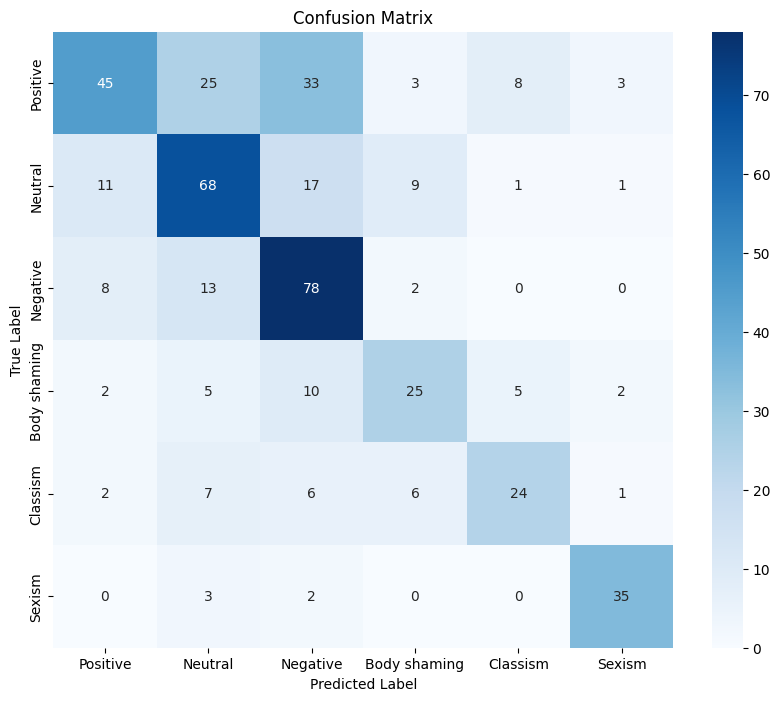

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# สร้าง confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)

# พล็อต confusion matrix ด้วย seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')

plt.show()

In [ ]:
model.load_state_dict(torch.load('bert_model.pt', map_location=device))
model.eval() #ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน

<ipython-input-58-6cf1e5225b57>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('bert_model.pt', map_location=device))


SentimentModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(25005, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

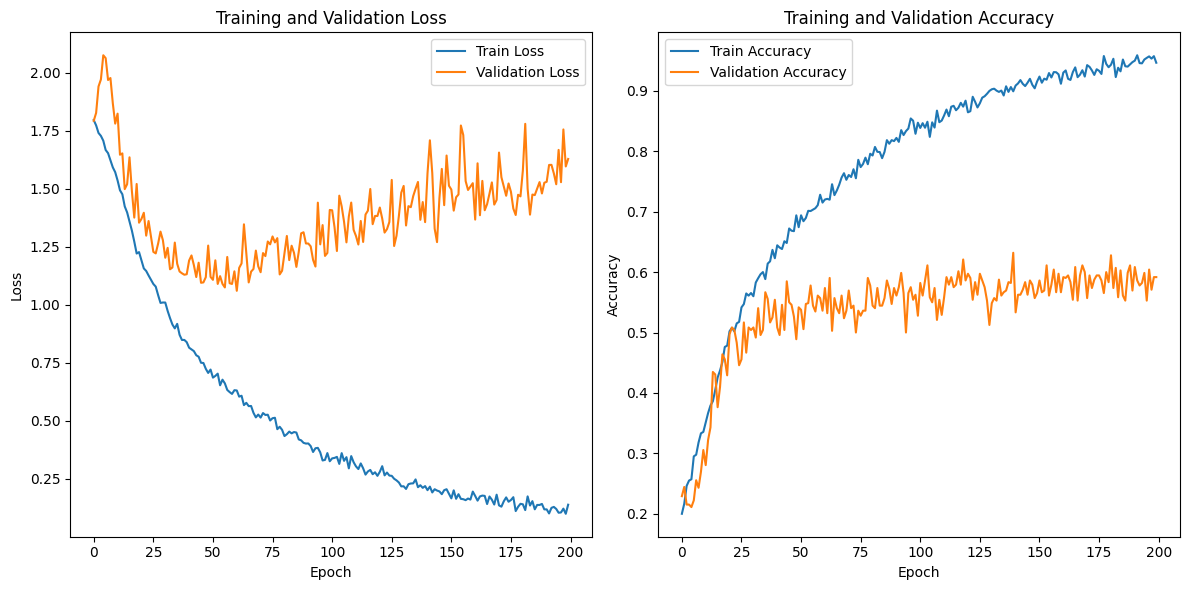

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_validation_plot.png')
plt.show()

In [ ]:
import torch
from transformers import BertModel, AutoTokenizer

# Load pre-trained BERT model and tokenizer
bert_pretrained = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_pretrained)
bert_model = BertModel.from_pretrained(bert_pretrained)

# Example input text
text = "This is an example sentence."

# Tokenize the text and convert to input IDs
inputs = tokenizer(text, return_tensors="pt")
input_ids = inputs["input_ids"]

# Print the input shape
print("Input shape:", input_ids.shape)

# Get BERT model output
with torch.no_grad():
    outputs = bert_model(input_ids)

# Print the output shape
print("Output shape:", outputs.last_hidden_state.shape)

# The output is a tuple, where the first element is the last_hidden_state,
# representing the sequence of hidden states from the last layer of BERT.

# If you're interested in the pooled output, you can access that too.
print("Pooled output shape:", outputs.pooler_output.shape)

You are using a model of type camembert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of BertModel were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 

Input shape: torch.Size([1, 18])
Output shape: torch.Size([1, 18, 768])
Pooled output shape: torch.Size([1, 768])


In [ ]:
from sklearn.metrics import classification_report

# Assuming `test_iter` is your test data iterator from the training code
# and `model` is your trained model
all_y_true = []
all_y_pred = []

# Iterate over your test data and collect predictions
with torch.no_grad():
    for batch in test_iter:
        predictions = model(batch.cleaned_review)
        y_pred = torch.argmax(predictions, dim=1).cpu().numpy()  # Get predicted labels
        y_true = batch.label.cpu().numpy()  # Get true labels
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

# Define target names (replace with your actual target names)
target_names = ['Positive','Neutral', 'Negative', 'Body shaming', 'Classism', 'Sexism']

# Generate classification report
report = classification_report(all_y_true, all_y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    Positive       0.60      0.47      0.53       117
     Neutral       0.61      0.64      0.62       107
    Negative       0.59      0.58      0.59       101
Body shaming       0.66      0.43      0.52        49
    Classism       0.43      0.72      0.54        46
      Sexism       0.73      0.88      0.80        40

    accuracy                           0.59       460
   macro avg       0.60      0.62      0.60       460
weighted avg       0.60      0.59      0.59       460



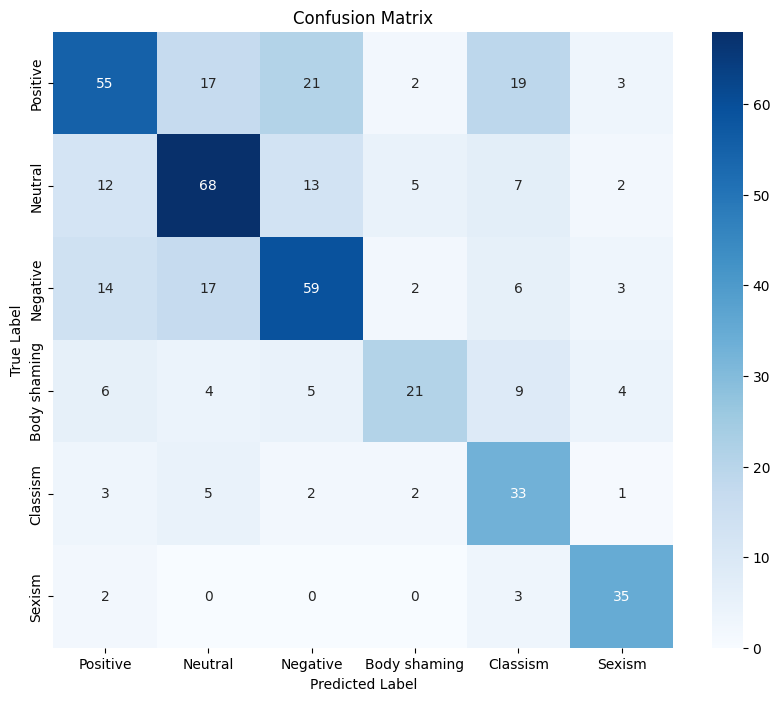

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# สร้าง confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)

# พล็อต confusion matrix ด้วย seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')

plt.show()

In [ ]:
model.load_state_dict(torch.load('bert_model.pt', map_location=device))


<ipython-input-63-2f851d075d54>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('bert_model.pt', map_location=device))


<All keys matched successfully>

In [ ]:
print(classification_report(all_y_true, all_y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Positive       0.60      0.47      0.53       117
     Neutral       0.61      0.64      0.62       107
    Negative       0.59      0.58      0.59       101
Body shaming       0.66      0.43      0.52        49
    Classism       0.43      0.72      0.54        46
      Sexism       0.73      0.88      0.80        40

    accuracy                           0.59       460
   macro avg       0.60      0.62      0.60       460
weighted avg       0.60      0.59      0.59       460



In [ ]:
model.load_state_dict(torch.load('bert_model.pt', map_location=device))
model.eval() #ต้องเรียก .eval() เมื่อต้องการทดสอบโมเดลเพื่อไม่ให้เอาข้อมูลเราทดสอบไปเทรน

<ipython-input-65-6cf1e5225b57>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('bert_model.pt', map_location=device))


SentimentModel(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(25005, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np

# Load pre-trained model and tokenizer (assuming you're using a Thai language model)
model_name = "airesearch/wangchanberta-base-att-spm-uncased"  # Replace with your actual model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(class_labels)) #added num_labels

# Define class labels - replace these with your actual class labels
# For example: ["negative", "neutral", "positive"]
class_labels = ['คำทั่วไปทางการชม', 'คำทั่วไป', 'คำหยาบปกติ', 'เหยียดรูปร่าง', 'เหยียดชนชั้น', 'เหยียดเพศ']

def predict_sentiment(model, tokenizer, text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Get model prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=1)

    return probabilities, inputs

def get_word_embeddings(model, tokenized_inputs):
    # Extract embeddings from the model's embedding layer
    with torch.no_grad():
        # Access the embedding layer (this may need adjustment based on your model architecture)
        embedding_layer = model.get_input_embeddings()
        word_embeddings = embedding_layer(tokenized_inputs['input_ids'])

    return word_embeddings

# Function to get user input and display prediction
def analyze_user_input():
    # Get user input
    user_text = input("กรุณาใส่ข้อความที่ต้องการวิเคราะห์ความรู้สึก: ")

    # Make prediction
    sentiment, tokenized_inputs = predict_sentiment(model, tokenizer, user_text)
    # print("Raw prediction tensor:", sentiment)

    # Get predicted class index
    predicted_class_index = torch.argmax(sentiment).item()
    # predicted_class_index = min(predicted_class_index, len(class_labels) - 1)  # Clamp the index #removed

    # Get predicted class label
    predicted_class_label = class_labels[predicted_class_index]

    # Display results
    print("\nผลการวิเคราะห์:")
    print("Predicted Class Index:", predicted_class_index)
    print("Predicted Class Label:", predicted_class_label)

    # Display probability distribution
    print("\nProbability distribution:")
    for i, label in enumerate(class_labels):
        #print(f"{label}: {sentiment[0][i].item():.4f}")
        print(f"{label}: {sentiment[0][i].item():.4f}") # Access elements using correct indexing

    # Get and display word embeddings
    word_embeddings = get_word_embeddings(model, tokenized_inputs)

    # Print token IDs and their corresponding words
    input_ids = tokenized_inputs['input_ids'][0]
    tokens = tokenizer.convert_ids_to_tokens(input_ids)

    print("\n**Word Embeddings:**")
    print("Shape of embeddings:", word_embeddings.shape)
    print(f"Number of tokens: {len(tokens)}")

    # Print tokens and first few dimensions of their embeddings
    for i, token in enumerate(tokens):
        if token in tokenizer.all_special_tokens:
            continue  # Skip special tokens like [CLS], [SEP], etc.

        # Print token and a sample of its embedding (first 5 dimensions)
        embedding_sample = word_embeddings[0, i, :5].tolist()  # First 5 dimensions as example
        print(f"Token: '{token}', Embedding (first 5 dims): {embedding_sample}")

# Run the analysis
if __name__ == "__main__":
    print("==== Thai Sentiment Analysis ====")
    analyze_user_input()

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


==== Thai Sentiment Analysis ====
กรุณาใส่ข้อความที่ต้องการวิเคราะห์ความรู้สึก: ไอ้อ้วนหมูตอน

ผลการวิเคราะห์:
Predicted Class Index: 0
Predicted Class Label: คำทั่วไปทางการชม

Probability distribution:
คำทั่วไปทางการชม: 0.2197
คำทั่วไป: 0.1975
คำหยาบปกติ: 0.1338
เหยียดรูปร่าง: 0.1547
เหยียดชนชั้น: 0.1322
เหยียดเพศ: 0.1621

**Word Embeddings:**
Shape of embeddings: torch.Size([1, 6, 768])
Number of tokens: 6
Token: '▁ไอ้', Embedding (first 5 dims): [0.022578487172722816, -0.08961966633796692, -0.1416594386100769, -0.050988126546144485, -0.027758728712797165]
Token: 'อ้วน', Embedding (first 5 dims): [-0.08321955800056458, -0.03936731815338135, -0.056861888617277145, 0.1152523085474968, 0.04316036030650139]
Token: 'หมู', Embedding (first 5 dims): [-0.04617825150489807, -0.027751870453357697, 0.0461968258023262, -0.07503604888916016, 0.015131414867937565]
Token: 'ตอน', Embedding (first 5 dims): [0.04232914000749588, 0.0823635682463646, -0.046847522258758545, -0.015643831342458725, -0.0944